In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DF = pd.read_csv("messy_sales_data.csv")
df = DF.copy()
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000,Error,South
1,2023-01-02,Unknown,50.0,NaN,NaN,South
2,2023-01-03,Tablet,30.0,Missing,Error,South
3,2023-01-04,NaN,NaN,50000,NaN,NaN
4,2023-01-05,Unknown,NaN,20000,50000,South
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,50000,250000,South
96,2023-04-07,Laptop,30.0,NaN,50000,East
97,2023-04-08,Laptop,100.0,20000,100000,South
98,2023-04-09,Tablet,30.0,20000,250000,South


In [3]:
df.isnull().sum()

Date               0
Product           19
Units_Sold        27
Price_per_Unit    16
Revenue           21
Region             9
dtype: int64

In [4]:
df["Product"] = df["Product"].fillna("Unknown")

In [5]:
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000,Error,South
1,2023-01-02,Unknown,50.0,NaN,NaN,South
2,2023-01-03,Tablet,30.0,Missing,Error,South
3,2023-01-04,Unknown,NaN,50000,NaN,NaN
4,2023-01-05,Unknown,NaN,20000,50000,South
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,50000,250000,South
96,2023-04-07,Laptop,30.0,NaN,50000,East
97,2023-04-08,Laptop,100.0,20000,100000,South
98,2023-04-09,Tablet,30.0,20000,250000,South


In [6]:
# Convverting all the string values to numeric values in units sold, price and revenue columns
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")
df["Price_per_Unit"] = pd.to_numeric(df["Price_per_Unit"], errors="coerce")
df["Units_Sold"] = pd.to_numeric(df["Units_Sold"], errors="coerce")

In [7]:
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000.0,NaN,South
1,2023-01-02,Unknown,50.0,NaN,NaN,South
2,2023-01-03,Tablet,30.0,NaN,NaN,South
3,2023-01-04,Unknown,NaN,50000.0,NaN,NaN
4,2023-01-05,Unknown,NaN,20000.0,50000.0,South
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,50000.0,250000.0,South
96,2023-04-07,Laptop,30.0,NaN,50000.0,East
97,2023-04-08,Laptop,100.0,20000.0,100000.0,South
98,2023-04-09,Tablet,30.0,20000.0,250000.0,South


In [8]:
# Filling emty values in cloumns units sold, price and revenue with basic mathematics
df["Units_Sold"] = df["Units_Sold"].fillna(df["Revenue"] // df["Price_per_Unit"])
df["Revenue"] = df["Revenue"].fillna(df["Units_Sold"] * df["Price_per_Unit"])
df["Price_per_Unit"] = df["Revenue"] // df["Units_Sold"]

In [9]:
# With this much data , if the some of the cells in these columns are still empty then it is safe to assume that they can't calculated due to lack of info.
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000.0,3000000.0,South
1,2023-01-02,Unknown,50.0,NaN,NaN,South
2,2023-01-03,Tablet,30.0,NaN,NaN,South
3,2023-01-04,Unknown,NaN,NaN,NaN,NaN
4,2023-01-05,Unknown,2.0,25000.0,50000.0,South
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,5000.0,250000.0,South
96,2023-04-07,Laptop,30.0,1666.0,50000.0,East
97,2023-04-08,Laptop,100.0,1000.0,100000.0,South
98,2023-04-09,Tablet,30.0,8333.0,250000.0,South


In [10]:
df = df.dropna(subset=["Units_Sold", "Price_per_Unit", "Revenue"])

In [11]:
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000.0,3000000.0,South
4,2023-01-05,Unknown,2.0,25000.0,50000.0,South
5,2023-01-06,Unknown,30.0,50000.0,1500000.0,East
7,2023-01-08,Unknown,30.0,8333.0,250000.0,West
9,2023-01-10,Unknown,30.0,8333.0,250000.0,Unknown
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,5000.0,250000.0,South
96,2023-04-07,Laptop,30.0,1666.0,50000.0,East
97,2023-04-08,Laptop,100.0,1000.0,100000.0,South
98,2023-04-09,Tablet,30.0,8333.0,250000.0,South


In [12]:
df.loc[:,"Region"] = df["Region"].fillna("Unknown")

In [13]:
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000.0,3000000.0,South
4,2023-01-05,Unknown,2.0,25000.0,50000.0,South
5,2023-01-06,Unknown,30.0,50000.0,1500000.0,East
7,2023-01-08,Unknown,30.0,8333.0,250000.0,West
9,2023-01-10,Unknown,30.0,8333.0,250000.0,Unknown
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,5000.0,250000.0,South
96,2023-04-07,Laptop,30.0,1666.0,50000.0,East
97,2023-04-08,Laptop,100.0,1000.0,100000.0,South
98,2023-04-09,Tablet,30.0,8333.0,250000.0,South


In [14]:
# Because we can't do anything about the missing values in the columns Product and Region we will change them into Others and Unknown Region
df.loc[df["Product"].str.strip().str.lower() == "unknown", "Product"] = "Others"
df.loc[df["Region"].str.strip().str.lower() == "unknown", "Region"] = "Unknown Region"

In [15]:
df

,Date,Product,Units_Sold,Price_per_Unit,Revenue,Region
0,2023-01-01,Tablet,100.0,30000.0,3000000.0,South
4,2023-01-05,Others,2.0,25000.0,50000.0,South
5,2023-01-06,Others,30.0,50000.0,1500000.0,East
7,2023-01-08,Others,30.0,8333.0,250000.0,West
9,2023-01-10,Others,30.0,8333.0,250000.0,Unknown Region
...,...,...,...,...,...,...
95,2023-04-06,Headphones,50.0,5000.0,250000.0,South
96,2023-04-07,Laptop,30.0,1666.0,50000.0,East
97,2023-04-08,Laptop,100.0,1000.0,100000.0,South
98,2023-04-09,Tablet,30.0,8333.0,250000.0,South


In [16]:
df.groupby("Product")["Units_Sold"].sum()

Product
Headphones    402.0
Laptop        633.0
Mobile        343.0
Others        725.0
Tablet        518.0
Name: Units_Sold, dtype: float64

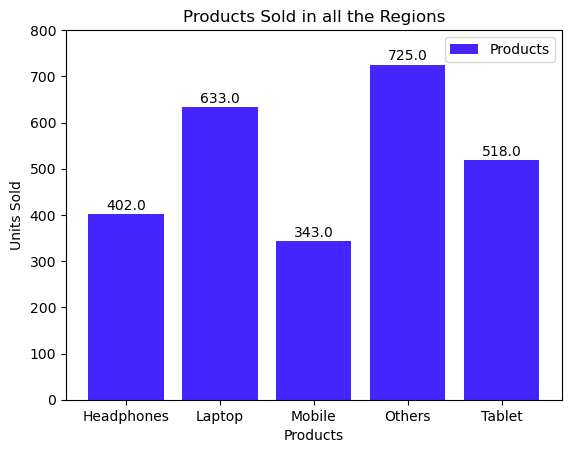

its not a significant answer but the best i could do for now with the given data


In [17]:
# Now to answer questions using graphs and bar charts
# Q.1) Which products are selling the most?
Products = ["Headphones", "Laptop", "Mobile", "Others", "Tablet"]
units_sold = [402.0, 633.0, 343.0, 725.0, 518.0]
plt.bar(Products, units_sold, label="Products", color="#4424FF")
plt.ylabel("Units Sold")
plt.xlabel("Products")
plt.title("Products Sold in all the Regions")
plt.ylim(0,800)
plt.legend()
for i in range(len(units_sold)):
    plt.text(i, units_sold[i] + 10, str(units_sold[i]), ha='center')
plt.show()

print("its not a significant answer but the best i could do for now with the given data")

In [18]:
# Revenue by product
df.groupby("Product")["Revenue"].sum()

Product
Headphones    4475000.0
Laptop        7750000.0
Mobile        2245000.0
Others        7350000.0
Tablet        4800000.0
Name: Revenue, dtype: float64

In [19]:
# Revenue by Region
df.groupby("Region")["Revenue"].sum()

Region
East              3500000.0
North             5025000.0
South             6800000.0
Unknown Region    4495000.0
West              6800000.0
Name: Revenue, dtype: float64

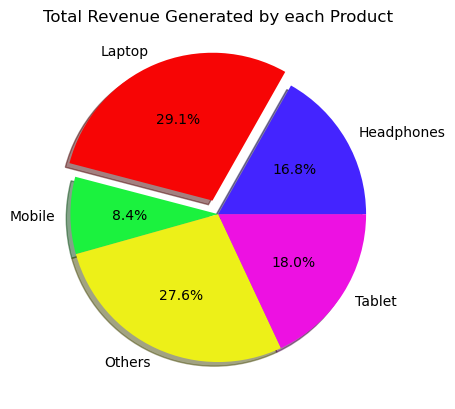

In [20]:
# Q.2) Which products/regions generate the most revenue?
# By Product
labels = ["Headphones", "Laptop", "Mobile", "Others", "Tablet"]
Revenues = [4475000.0,7750000.0,2245000.0,7350000.0, 4800000.0]
colors = ["#4424FF", "#F70505", "#1BF23E", "#EDF018", "#ED11E2"]
explode = [0,0.1,0,0,0]
plt.pie(Revenues, shadow=True, colors=colors, labels=labels, autopct='%1.1f%%',explode=explode)
plt.title("Total Revenue Generated by each Product")
plt.show()

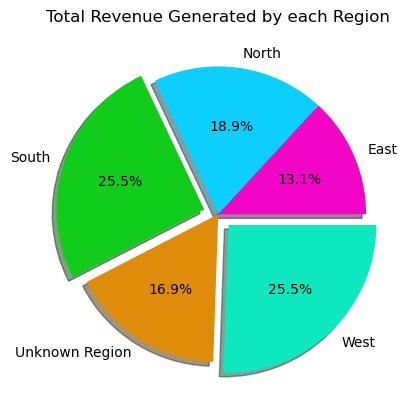

In [21]:
# By region
regions = ["East","North","South","Unknown Region","West"]
revenues = [3500000.0, 5025000.0, 6800000.0, 4495000.0, 6800000.0]
explode = [0, 0, 0.1, 0, 0.1]
colors = ["#F205C6", "#0DCFFF", "#12CC1C", "#E08C0B", "#0EE8BF"]
plt.pie(revenues, labels=regions, shadow=True, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title("Total Revenue Generated by each Region")
plt.show()

In [22]:
df.groupby(["Product","Region"])["Revenue"].sum()

Product     Region        
Headphones  East               650000.0
            North              625000.0
            South              550000.0
            Unknown Region    1700000.0
            West               950000.0
Laptop      East                50000.0
            North             2800000.0
            South              200000.0
            Unknown Region     350000.0
            West              4350000.0
Mobile      East                50000.0
            North              250000.0
            South              250000.0
            Unknown Region    1295000.0
            West               400000.0
Others      East              2500000.0
            North              800000.0
            South             2200000.0
            Unknown Region     750000.0
            West              1100000.0
Tablet      East               250000.0
            North              550000.0
            South             3600000.0
            Unknown Region     400000.0
Name: Revenue

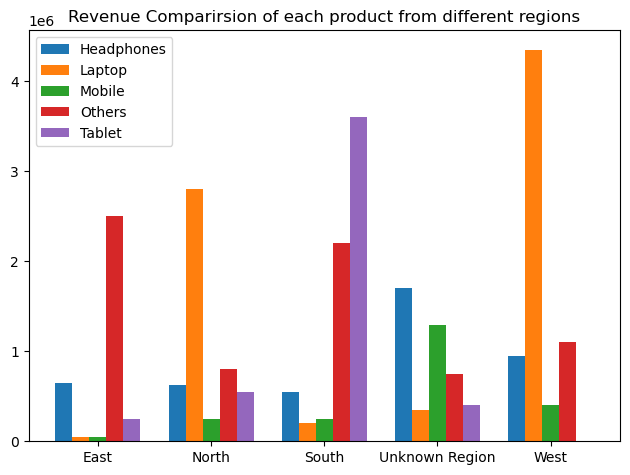

In [23]:
# Comparision by Product and Region
regions = ["East", "North", "South", "Unknown Region", "West"]
Headphones = [650000.0, 625000.0, 550000.0, 1700000.0, 950000.0]
Laptop = [50000.0, 2800000.0, 200000.0, 350000.0, 4350000.0]
Mobile = [50000.0, 250000.0, 250000.0, 1295000.0, 400000.0]
Others = [2500000.0, 800000.0, 2200000.0, 750000.0, 1100000.0]
Tablet = [250000.0, 550000.0, 3600000.0, 400000.0, 0]

x = np.arange(len(regions))
width = 0.15

plt.bar(x - 2 * width, Headphones, width=width, label="Headphones")
plt.bar(x - width, Laptop, width=width, label="Laptop")
plt.bar(x, Mobile, width=width, label="Mobile")
plt.bar(x + width, Others, width=width, label="Others")
plt.bar(x + 2 * width, Tablet, width=width, label="Tablet")
plt.legend()
plt.xticks(x, regions)
plt.tight_layout()
plt.title("Revenue Comparirsion of each product from different regions")
plt.show()

In [24]:
df.to_csv("Cleaned_Data.csv", index=False)